<a href="https://colab.research.google.com/github/Loriane-07/PRA3024AnalysisofBigDatainPhysics/blob/main/Week3_LHCb_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

If you are using Google Colab then you need to ensure that you are using Python 2:

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top or create a new notebook in Python2 by appending "&runtime=python2" to the URL.

In [1]:
#Colab only
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2021-03-01 19:25:21--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.18.236, 2001:1458:201:ee::100:6
Connecting to root.cern.ch (root.cern.ch)|137.138.18.236|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.5’

root_v6.13.08.Linux 100%[===================>] 131.05M  29.9MB/s    in 5.1s    

2021-03-01 19:25:27 (25.8 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz.5’ saved [137415272/137415272]



In [2]:
#Colab only:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes


ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libPyROOT.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGpad.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 5654f5742800 at 7fd743d16290>

Welcome to JupyROOT 6.13/08


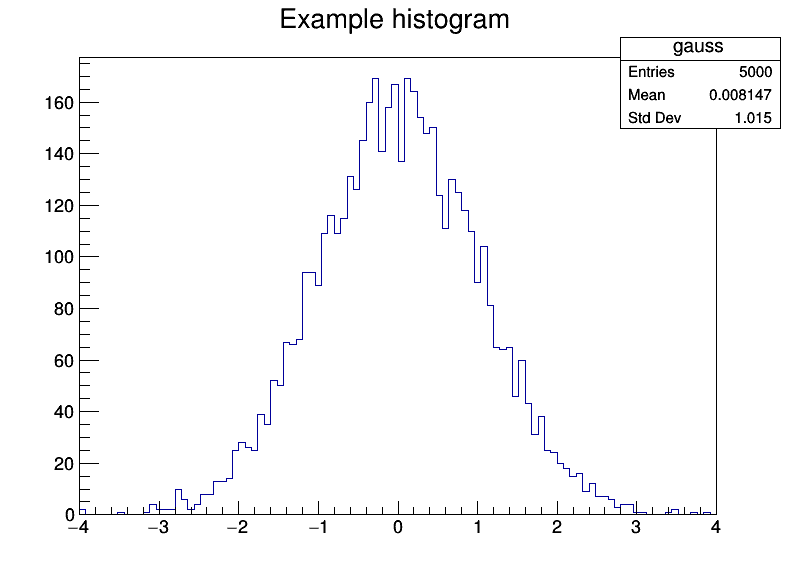

In [3]:
#Now we can check if we have everything working as we expect: 
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data file - you can find it on Canvas here: https://maastrichtuniversity.instructure.com/courses/5826/files/553829?module_item_id=115201

Then upload it either directly or to your Google Drive and then mount this to your Colab environment


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PX) TTree Float_t branch H1_PX will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PY) TTree Float_t branch H1_PY will be converted to double precision
[#1] INFO:Eval -- RooAbsReal::attachToTree(H1_PZ) TTree Float_t branch H1_PZ will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3305139 out of range events


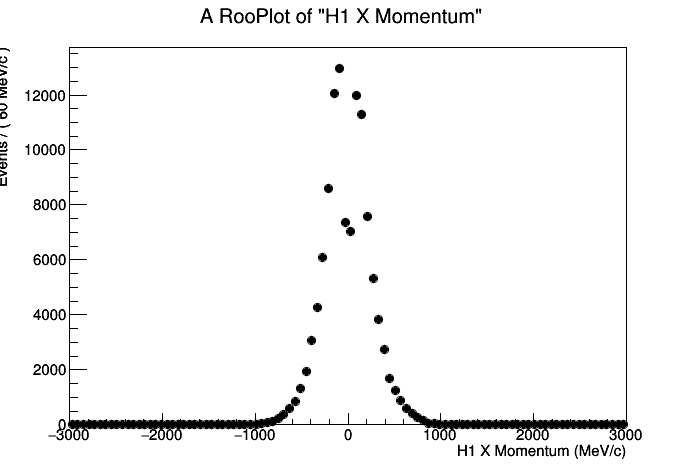

In [4]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command. - note you need to make this file path correct for your own setup!
f = ROOT.TFile.Open("B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("data")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",-3000,3000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",-3000,3000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",-3000,3000,"MeV/c")
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable called H1_Ptot

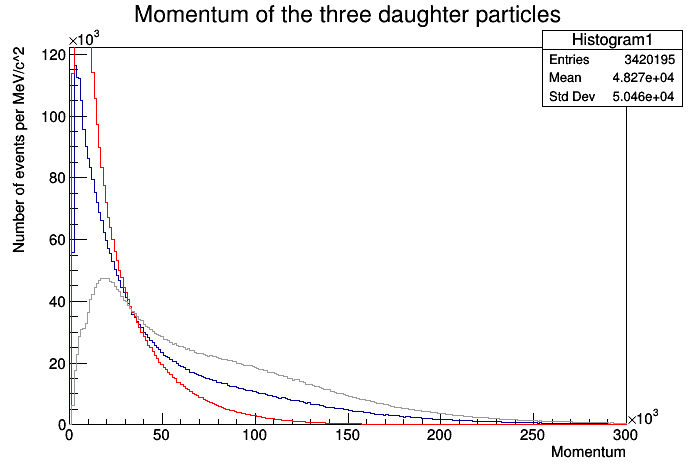

In [5]:
#Here make a plot of the Total momentum of each of the three daughters
momentum_canvas = ROOT.TCanvas("canvas")

tree.Draw("H1_Ptot>>Histogram1(250, 0, 300000)")
Histogram1 = ROOT.gDirectory.Get("Histogram1")

tree.Draw("H2_Ptot>>Histogram2(250, 0, 300000)")
Histogram2 = ROOT.gDirectory.Get("Histogram2")

tree.Draw("H3_Ptot>>Histogram3(250, 0, 300000)")
Histogram3 = ROOT.gDirectory.Get("Histogram3")

Histogram1.Draw()
Histogram2.Draw("same")
Histogram3.Draw("same")

Histogram2.SetLineColor(2)
Histogram3.SetLineColor(15)

Histogram1 = ROOT.gDirectory.Get("Histogram1")
Histogram1.SetXTitle("Momentum")
Histogram1.SetTitle("Momentum of the three daughter particles")
Histogram1.SetYTitle("Number of events per MeV/c^2")

momentum_canvas.Draw()

Now plot the total momentum for the mother (M_Ptot)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


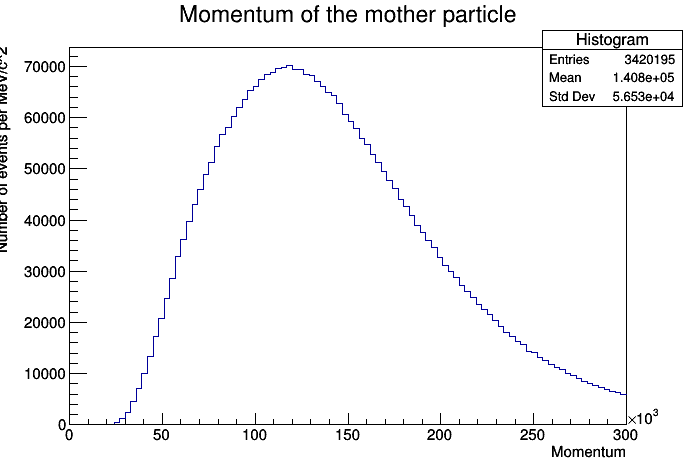

In [6]:
#use the histogram plotting tools, plot the momentum of the mother
from ROOT import TCanvas, TPad, TFile, TPaveLabel, TPaveText
from ROOT import gROOT

Tcanvas = ROOT.TCanvas("canvas")
tree.Draw("M_Ptot>>Histogram(100,0,300000)")
Histogram = ROOT.gDirectory.Get("Histogram")
Histogram.SetTitle("Momentum of the mother particle")
Histogram.SetXTitle("Momentum")
Histogram.SetYTitle("Number of events per MeV/c^2")
Tcanvas.Draw()

The two graphs displayed above show that the total momentum of the mother particle is different than the momentum of her three daughters.

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [7]:
tree.Show(45)

======> EVENT:45
 B_FlightDistance = 4.71407
 B_VertexChi2    = 11.5278
 H1_PX           = 133.376
 H1_PY           = -1293.52
 H1_PZ           = 33534.2
 H1_ProbK        = 0.00735235
 H1_ProbPi       = 0.204907
 H1_Charge       = 1
 H1_IPChi2       = 22.9885
 H1_isMuon       = 0
 H2_PX           = 518.943
 H2_PY           = -1966.2
 H2_PZ           = 52184.7
 H2_ProbK        = 0.00482044
 H2_ProbPi       = 0.266655
 H2_Charge       = -1
 H2_IPChi2       = 20.5652
 H2_isMuon       = 0
 H3_PX           = 1383.62
 H3_PY           = -2008.35
 H3_PZ           = 12154
 H3_ProbK        = 0.0800247
 H3_ProbPi       = 0.403711
 H3_Charge       = -1
 H3_IPChi2       = 1584.95
 H3_isMuon       = 0
 H1_Ptot         = 33559.4
 H1_type         = 1
 H1_E            = 33559.7
 H2_Ptot         = 52224.4
 H2_type         = 1
 H2_E            = 52224.5
 H3_Ptot         = 12396.2
 H3_type         = 1
 H3_E            = 12397
 M_Ptot          = 98035.7
 M_E             = 98181.3
 M_m0            = 5343.69

We have now completed the initial steps and begun to work through what we need to with the data. This is a perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energy, we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


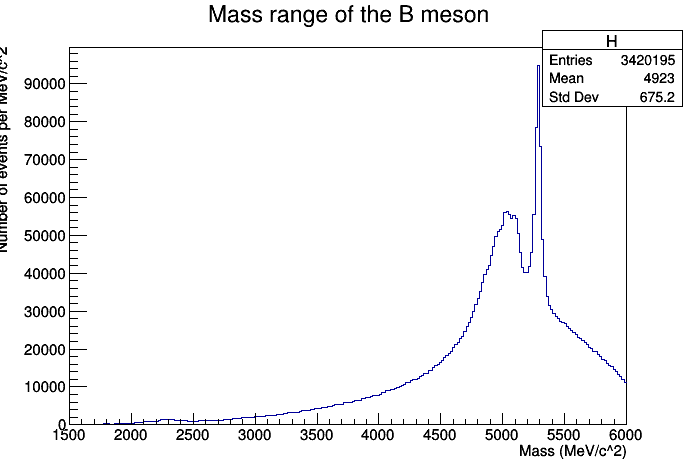

In [8]:
#Now plot a histogram of the range of masses of the B meson.
import scipy.constants
import math

mass_canvas = ROOT.TCanvas("canvas")
tree.Draw("M_m0>>H(250, 1500, 6000)")
H = ROOT.gDirectory.Get("H")
H.SetXTitle("Mass (MeV/c^2)")
H.SetYTitle("Number of events per MeV/c^2")
H.SetTitle("Mass range of the B meson")
mass_canvas.Draw()

**Does this match what we would expect from theory?**

 Yes. The graph above shows that the mass of the B meson is a bit lower than 5500 MeV/c^2. This matches the theoretical predictions, 5279 MeV/c^2. 

In order to confirm the results, the mass of the B meson was also calculated using the formula E² = m²c^4 + p²c² (c is a constant and was therefore set to 1). The plot below shows that whether the formula is used or the variable within the dataset, the mass of the B meson is about 5300 MeV/c².

In addition, this is also confirmed by the entry printed before the graphs. For this specific entry (45), the mass of the mother particle is said to be 5343,69 MeV/c².

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


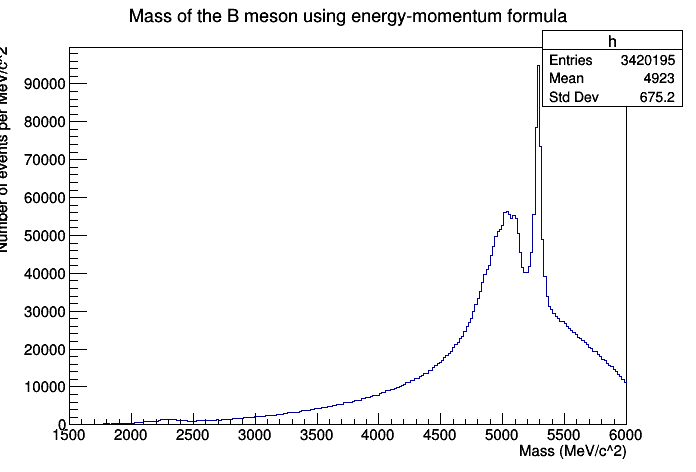

In [9]:
mass_canv = ROOT.TCanvas("canvas")
tree.Draw("sqrt(M_E*M_E - M_Ptot*M_Ptot*1**2)/1**2>>h(250, 1500, 6000)")
h = ROOT.gDirectory.Get("h")
h.SetXTitle("Mass (MeV/c^2)")
h.SetYTitle("Number of events per MeV/c^2")
h.SetTitle("Mass of the B meson using energy-momentum formula")
mass_canv.Draw()

We know that some of our particles are the B+ and some are the B- particle. There will also be some particles in our system that are not coming from a genuine B+/- or are a B+/- but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


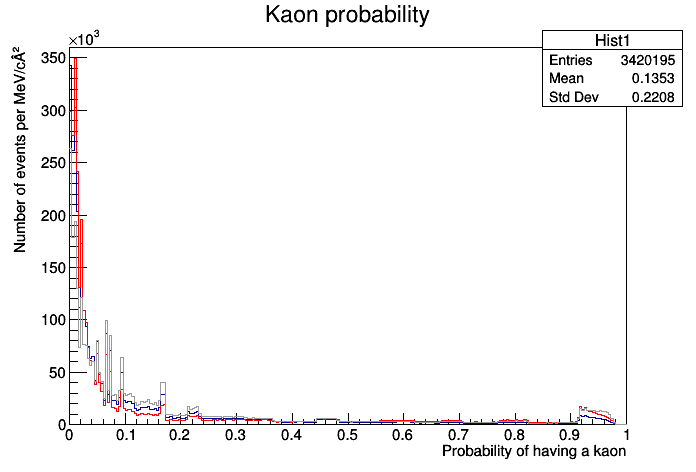

In [10]:
#Make plots of H1/H2/H3 _ProbK on one plot
import ROOT

kaon_canvas = ROOT.TCanvas("canvas")

tree.Draw("H1_ProbK>>Hist1(250, 0, 1)")
Hist1 = ROOT.gDirectory.Get("Hist1")

tree.Draw("H2_ProbK>>Hist2(250, 0, 1)")
Hist2 = ROOT.gDirectory.Get("Hist2")

tree.Draw("H3_ProbK>>Hist3(250, 0, 1)")
Hist3 = ROOT.gDirectory.Get("Hist3")

Hist1.SetXTitle("Probability of having a kaon")
Hist1.SetTitle("Kaon probability")
Hist1.SetYTitle("Number of events per MeV/c²")

Hist1.Draw()
Hist2.Draw("same")
Hist3.Draw("same")

Hist2.SetLineColor(2)
Hist3.SetLineColor(15)

kaon_canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


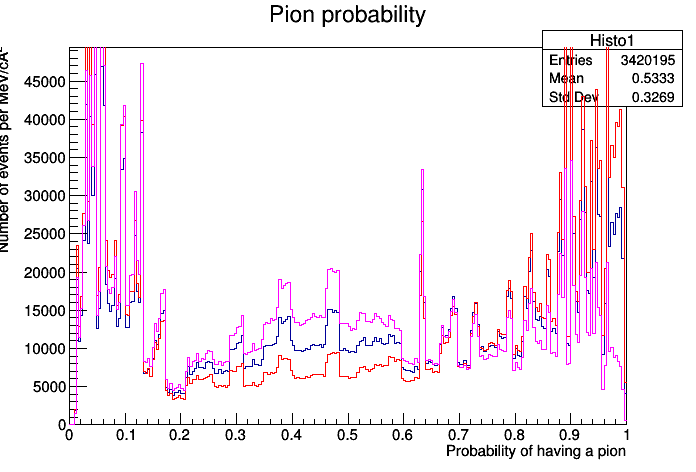

In [11]:
#Make plots of H1/H2/H3 _ProbPi on one plot

pion_canvas = ROOT.TCanvas("canvas")

tree.Draw("H1_ProbPi>>Histo1(250, 0, 1)")
Histo1 = ROOT.gDirectory.Get("Histo1")

tree.Draw("H2_ProbPi>>Histo2(250, 0, 1)")
Histo2 = ROOT.gDirectory.Get("Histo2")

tree.Draw("H3_ProbPi>>Histo3(250, 0, 1)")
Histo3 = ROOT.gDirectory.Get("Histo3")

Histo1.Draw()
Histo2.Draw("same")
Histo3.Draw("same")

Histo2.SetLineColor(2)
Histo3.SetLineColor(6)

Histo1.SetXTitle("Probability of having a pion")
Histo1.SetTitle("Pion probability")
Histo1.SetYTitle("Number of events per MeV/c²")
pion_canvas.Draw()


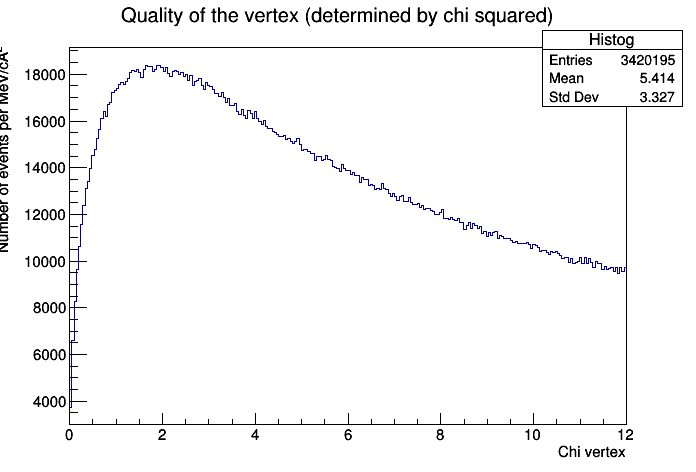

In [12]:
vertex_canvas = ROOT.TCanvas("vertex_canvas")

tree.Draw("B_VertexChi2>>Histog(250, 0, 12)")
Histog = ROOT.gDirectory.Get("Histog")
Histog.SetXTitle("Chi vertex")
Histog.SetYTitle("Number of events per MeV/c²")
Histog.SetTitle("Quality of the vertex (determined by chi squared)")
Histog.Draw()
vertex_canvas.Draw()

Using these plots, we can now make a preselection string. This is a text string that looks like 

In [13]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon
#This is not a good choice of selection - you should make your own :)
#selection=("H1_ProbPi<0.1&H2_ProbPi<0.1&H3_ProbPi<0.1&!H1_isMuon &!H2_isMuon &!H3_isMuon")

In [14]:
#To apply the selection - we can use the copytree command:
selection=("H1_ProbK>0.3&H2_ProbK>0.3&H3_ProbK>0&!H1_isMuon &!H2_isMuon &!H3_isMuon&H1_ProbPi<0.1&H2_ProbPi<0.1&H3_ProbPi<0.1")
CutTree=tree.CopyTree(selection)
CutTree.Show()
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) 
#and put the new data in CutTree

======> EVENT:-1
 B_FlightDistance = 22.4692
 B_VertexChi2    = 1.9224
 H1_PX           = -632.231
 H1_PY           = -25.2678
 H1_PZ           = 4828.79
 H1_ProbK        = 0.00679082
 H1_ProbPi       = 0.868581
 H1_Charge       = -1
 H1_IPChi2       = 2827.76
 H1_isMuon       = 0
 H2_PX           = -2372.79
 H2_PY           = -327.853
 H2_PZ           = 14037.1
 H2_ProbK        = 0.0221071
 H2_ProbPi       = 0.713949
 H2_Charge       = 1
 H2_IPChi2       = 24397.4
 H2_isMuon       = 0
 H3_PX           = -3283.51
 H3_PY           = 4887.79
 H3_PZ           = 54015.4
 H3_ProbK        = 0.0291707
 H3_ProbPi       = 0.881665
 H3_Charge       = 1
 H3_IPChi2       = 4466.18
 H3_isMuon       = 0
 H1_Ptot         = 4870.07
 H1_type         = 0
 H1_E            = 4895.03
 H2_Ptot         = 14240
 H2_type         = 0
 H2_E            = 14248.5
 H3_Ptot         = 54335.4
 H3_type         = 0
 H3_E            = 54337.6
 M_Ptot          = 73292.5
 M_E             = 73481.2
 M_m0            = 5263.

The probability of being a Kaon was set to 0.3 because if we take a look at the graph, it can be seen that between 0.3 and 0.9, there are relatively few events occuring. As the daughter particles of the decay studied are kaons, we want to make sure that our selection includes as many kaons as possible. This is why the value was set to 0.3, because the amount of event occuring with a probability higher than 0.9 is not important enough in order to have a decent dataset.

The detector has specific detectors for muons. Thus, it can identify by itself whether a particle is a muon or not. We want to make sure that no muons are in our dataset so we excluded all the data points that were muons.

Finally, all the events which had a probability lower than 0.1 to be pions were included in the dataset. Pions are not part of the daughter particles expected from the decay. However, many events have been attributed a probabiliity of being pions lower than 0.1. This threshold is judged small enough to question the identity of the particle and was thus added to the dataset. 

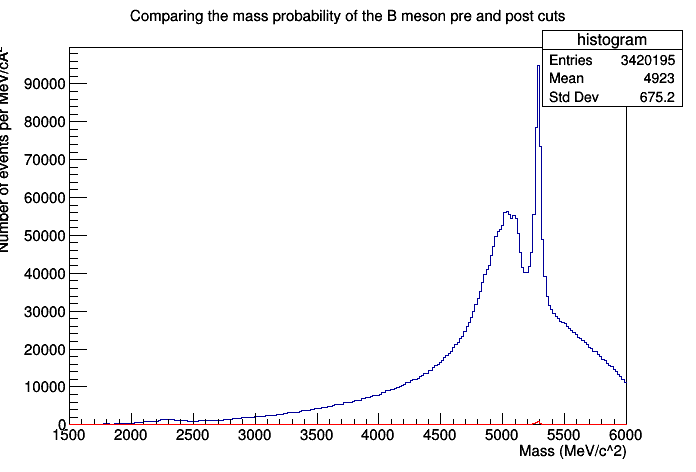

In [15]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the tree (pre-cuts) and the CutTree (post-cuts)

B_canvas = ROOT.TCanvas("B_canvas")

tree.Draw("M_m0>>histogram(250, 1500, 6000)")
histogram = ROOT.gDirectory.Get("histogram")

CutTree.Draw("M_m0>>histogram1(250, 1500, 6000)")
histogram1 = ROOT.gDirectory.Get("histogram1")

histogram1.SetLineColor(2)

histogram.SetXTitle("Mass (MeV/c^2)")
histogram.SetTitle("Comparing the mass probability of the B meson pre and post cuts")
histogram.SetYTitle("Number of events per MeV/c²")

leg = ROOT.TLegend()
leg.SetHeader("Legend")
leg.AddEntry(histogram, "Mass pre-cuts")
leg.AddEntry(histogram1, "Mass post-cuts")
leg.Draw("same")

histogram.Draw()
histogram1.Draw("same")
B_canvas.Draw()

**What do you notice about your histogram now?**

The graph above displays the mass of the B-meson pre-cuts in blue (for some reason, the legend does not appear on the graph however, this is known by analogy to the previous graph which displayed the mass of the B-meson). The red curve then represents the mass of the B-meson post cuts. The graph displays that the number of events present in the cut dataset is way lower than in the original dataset. This means that the cuts applied were quite restrictive and plotting the data also ensures that the cuts were applied and that the new tree contains entries.

Below is the graph of the B-meson post cuts on its own. This allows for the comparison of scales. As can be seen the curve post-cuts has the same shape as the curve pre-cuts but the scale is way smaller (about 340 times smaller) for the post-cut dataset than for the pre-cut dataset.

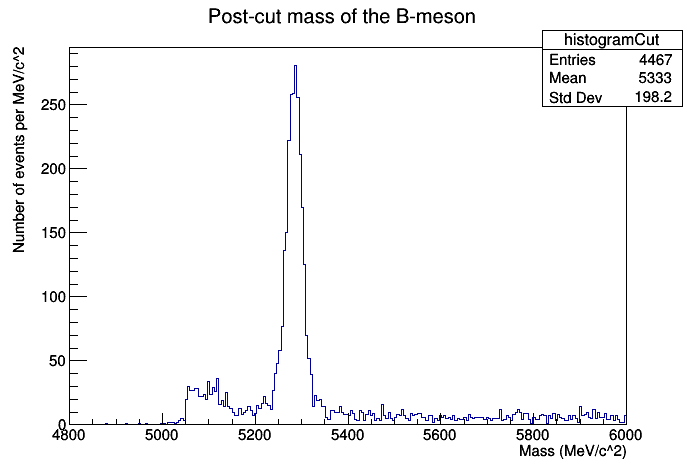

In [16]:
#Plotting the post-cuts dataset
cut_canvas = ROOT.TCanvas("cut_canvas")

CutTree.Draw("M_m0>>histogramCut(250, 4800, 6000)")
histogramCut = ROOT.gDirectory.Get("histogramCut")

histogramCut.SetYTitle("Number of events per MeV/c^2")
histogramCut.SetXTitle("Mass (MeV/c^2)")
histogramCut.SetTitle("Post-cut mass of the B-meson")
histogramCut.Draw()
cut_canvas.Draw()


The plot above shows that both the initial tree and the cut tree have the same shape. In addition, it can be observed that the mass of the B meson is still around 5300 MeV/c² (which was expected).

#How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

**Gauss + Exponential**

In [17]:
#define physical measurment that we want to fit using RooRealVar
# var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("M_m0","Mass",5050,5600,"MeV/C^{2}") #range established with info from previous graphs about m of B-meson

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean", 4900,4700,5900)
gaussWidth = ROOT.RooRealVar("Width","Width of the gaussian",40,0,7000)


#Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/10, 0, tree.GetEntries()*2)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exp", "The exponential background", 0.02, 0, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/10, 0, tree.GetEntries()*2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, exp_Norm) )

print(model)

<ROOT.RooAddPdf object ("Full Model") at 0x5655231cd000>


In [18]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("CutTree","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(CutTree) Ignored 792 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gaussian Signal,Exponential Background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Gauss_Norm   3.42019e+05  1.71010e+05    0.00000e+00  6.84039e+06
     2 Mean         4.90000e+03  1.00000e+02    4.70000e+03  5.90000e+03
     3 Width        4.00000e+01  2.00000e+01    0.00000e+00  7.00000e+03
     4 exp          2.00000e-02  1.00000e-02    0.00000e+00  2.00000e+00


3.26819064459
[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Gauss' does not select any components of p.d.f.
[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Bkgnd' does not select any components of p.d.f.


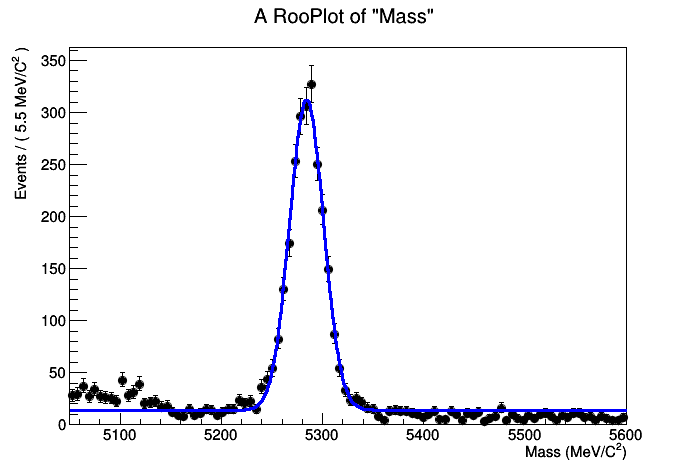

In [19]:
#Now to plot it all
canvas1=ROOT.TCanvas("canvas1", "canvas1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
print(frame.chiSquare())
# To make a legend
leg = ROOT.TLegend(0.1, 0.7, 0.3, 1.7)
leg.SetHeader()
leg.AddEntry("Gauss", "Bkgnd")
leg.Draw("same")

frame.Draw()
canvas1.Draw()

**Comments on the fitting**

The plot above is the fitting of the cut dataset with the approximations that the signal has a gaussian shape and that the background has an exponential shape. The graph displays that the signal is very well fitted to the dataset. Also, it can be seen that there is very little background in this graph. In fact, the exponential is rather flat. This means that for the range investigated, the data points are mainly signals.

The parameters to define the exponential and the gaussian shapes have been tuned such that the errors gathered while runnig the code box above the plot code box disappeared. The errors gathered while using the raw code from https://github.com/cpawley/PhysicsDataAnalysis/blob/master/ParticlePhysics/LHCb_2021.ipynb were:

1. Parameter 1: limits are too far apart
2. Parameter 4: data has upper/lower limits allowed
3. Parameter 5: limits are too far apart
4. pdf integral is zero or negative 



Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do all):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

**Crystal Ball + Exponential**

In [20]:
#define physical measurment that we want to fit using RooRealVar
mass = ROOT.RooRealVar("M_m0","Mass",5050,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
#For the RooRealVar the last three parameters are given, "starting value" and min/max values
crystalMean = ROOT.RooRealVar("Mean","Mean", 4900,4700,5900)
crystalWidth = ROOT.RooRealVar("Width","Width of the Crystak Ball function",40,0,7000)
alpha_1 = ROOT.RooRealVar('alpha_1', '', 0.1, 0, 1)
n_1 = ROOT.RooRealVar('n_1', '', 3, 1, 100)

#Now we have enough to make our Model for the signal:

Crystal_ball = ROOT.RooCBShape("Crystal Ball Signal","Crystal",mass,crystalMean,crystalWidth,alpha_1,n_1)
Crystal_ball_Norm= ROOT.RooRealVar("Crystal_ball_Norm","Signal Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)

#We also need a background, so let's use a (simple) exponential:

exponent=ROOT.RooRealVar("exp", "The exponential background", 0.025, 0, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model_2=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Crystal_ball,Bkgnd),ROOT.RooArgList(Crystal_ball_Norm, exp_Norm) )


In [21]:
#Put our data set into a RooDataSet structure

data_to_fit=ROOT.RooDataSet("CutTree","data_to_fit", CutTree, ROOT.RooArgSet(mass))

#Then we can do the fitting:

model_2.fitTo(data_to_fit)

#if everything went well, you will see the outputs of RooFit below

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(CutTree) Ignored 440 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Crystal Ball Signal,Exponential Background)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Crystal_ball_Norm   3.42019e+05  1.71010e+05    0.00000e+00  6.84039e+06
     2 Mean         4.90000e+03  1.00000e+02    4.70000e+03  5.90000e+03
     3 Width        4.00000e+01  2.00000e+01    0.00000e+00  7.00000e+03
     4 alpha_1      1.00000e-01  5.00000e-02    0.00000e+00  1

[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Crystal_ball' does not select any components of p.d.f.
[#0] ERROR:Plotting -- RooAbsPdf::plotOn(Full Model) ERROR: component selection expression 'Bkgnd' does not select any components of p.d.f.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


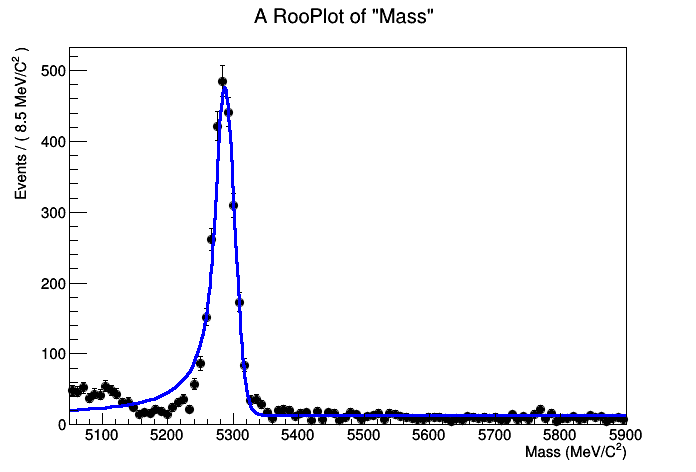

In [22]:
#Now to plot it all
canvas1=ROOT.TCanvas("canvas1", "canvas1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model_2.plotOn(frame, ROOT.RooFit.Components("Crystal_ball"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model_2.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model_2.plotOn(frame)
frame.chiSquare()
frame.Draw()
canvas1.Draw()

**Comments on the fitting**

The plot above displays the data post-cuts under the assumptions that the signal has a Crystal ball shape while the background has an exponential shape. The graph is well fitted to the data. Again, here there seems to be really little background to be seen. Maybe the range chosen does not allow the exponential to be represented. However, if the number of events is looked at, it is quite small. This might indicate that the cuts performed were so restrictive that really little background is still present in the dataset.

If both graph are compared, I would say the the exponential (background) and the gaussian (signal) is the best fit for the dataset at hand.

In [23]:
#help(ROOT.RooChebychev())

**Gauss + Chebychev**

Below is the attempt to create a code to fit a gaussian signal with a chebychev background. However, the attemps was unsuccessful as I could not find which parameters should be given in the chebychev function from the ROOT manual. (I found some explanations in C++ but I was unable to convert it into python).

In [24]:
"""define physical measurment that we want to fit using RooRealVar
var = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)
mass = ROOT.RooRealVar("M_m0","Mass",4700,5900,"MeV/C^{2}")

passing the rest of the variables into the model
For the RooRealVar the last three parameters are given, "starting value" and min/max values
gaussMean = ROOT.RooRealVar("Mean","Mean", 4900,4700,5900)
gaussWidth = ROOT.RooRealVar("Width","Width of the gaussian",40,0,7000)


Now we have enough to make our Model for the signal:

Gauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)
Gauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)

We also need a background, so let's use a (simple) exponential:

chebychev=ROOT.RooRealVar("chebychev", "The chebychev background", 0.02, 0, +2)
chebychev_Norm= ROOT.RooRealVar("chebychev_Norm","Background Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)

Define the  model for the background:
Bkgnd=ROOT.RooChebychev("Chebychev Background", )

Bkgnd=ROOT.RooChebychev("Chebychev Background","Bkgnd",mass,chebychev)

Now we need to combine these two functions into a single PDF (probability density function)
and we need to add the normalisation factors at the end as scaling factors

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(Gauss_Norm, chebychev_Norm) )"""

'define physical measurment that we want to fit using RooRealVar\nvar = ROOT.RooRealVar =("Variable from Python", "Nickname",Min, Max, Units)\nmass = ROOT.RooRealVar("M_m0","Mass",4700,5900,"MeV/C^{2}")\n\npassing the rest of the variables into the model\nFor the RooRealVar the last three parameters are given, "starting value" and min/max values\ngaussMean = ROOT.RooRealVar("Mean","Mean", 4900,4700,5900)\ngaussWidth = ROOT.RooRealVar("Width","Width of the gaussian",40,0,7000)\n\n\nNow we have enough to make our Model for the signal:\n\nGauss=ROOT.RooGaussian("Gaussian Signal","Gauss",mass,gaussMean,gaussWidth)\nGauss_Norm= ROOT.RooRealVar("Gauss_Norm","Signal Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)\n\nWe also need a background, so let\'s use a (simple) exponential:\n\nchebychev=ROOT.RooRealVar("chebychev", "The chebychev background", 0.02, 0, +2)\nchebychev_Norm= ROOT.RooRealVar("chebychev_Norm","Background Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)\n\nDefi

So how good was the fit, and how many events do you have?

We can use the .getValV() function on our signal and background *normalisation* components, e.g. Gauss_Norm=Gauss.getValV()

To find the error (on this number) we can use .getError()

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

In [25]:
#Attributing B- 
selection_m = ("H1_Charge==1&H2_Charge==-1&H3_Charge==-1 || H1_Charge==-1&H2_Charge==1&H3_Charge==-1|| H1_Charge==-1&H2_Charge==-1&H3_Charge==1")
minusTree =CutTree.CopyTree(selection_m)
minusTree.Show(7) #making sure tree is not empty

# Attributing B+
selection_p = ("H1_Charge==1&H2_Charge==1 || H1_Charge==1&H3_Charge==1 || H2_Charge==1& H3_Charge==1")
plusTree =CutTree.CopyTree(selection_p)
plusTree.Show(5) # checking if tree has entries

======> EVENT:7
 B_FlightDistance = 3.41246
 B_VertexChi2    = 7.60785
 H1_PX           = -1273.91
 H1_PY           = 1822.73
 H1_PZ           = 35870.7
 H1_ProbK        = 0.468426
 H1_ProbPi       = 0.0324038
 H1_Charge       = 1
 H1_IPChi2       = 73.5595
 H1_isMuon       = 0
 H2_PX           = 761.748
 H2_PY           = 252.863
 H2_PZ           = 16022.8
 H2_ProbK        = 0.614583
 H2_ProbPi       = 0.0390187
 H2_Charge       = -1
 H2_IPChi2       = 18.5432
 H2_isMuon       = 0
 H3_PX           = 1109.51
 H3_PY           = -1037.39
 H3_PZ           = 7876.55
 H3_ProbK        = 0.344959
 H3_ProbPi       = 0.039833
 H3_Charge       = -1
 H3_IPChi2       = 885.942
 H3_isMuon       = 0
 H1_Ptot         = 35939.6
 H1_type         = 0
 H1_E            = 35943
 H2_Ptot         = 16042.9
 H2_type         = 0
 H2_E            = 16050.5
 H3_Ptot         = 8021.67
 H3_type         = 0
 H3_E            = 8036.85
 M_Ptot          = 59782.1
 M_E             = 60030.4
 M_m0            = 5453.61
=

**Fitting the models**

In [31]:
#define physical measurment that we want to fit using RooRealVar
mass = ROOT.RooRealVar("M_m0","Mass",5050,5900,"MeV/C^{2}")

#passing the rest of the variables into the model
crystalMean = ROOT.RooRealVar("Mean","Mean", 4900,4700,5900)
crystalWidth = ROOT.RooRealVar("Width","Width of the Crystak Ball function",40,0,7000)
alpha1 = ROOT.RooRealVar('alpha1', '', 0.1, 0, 1)
alpha2 = ROOT.RooRealVar('alpha2', '', 0.1, 0, 1)
n1 = ROOT.RooRealVar('n2', '', 3, 1, 100)
n2 = ROOT.RooRealVar('n2', '', 3, 1, 100)

#Model for the signal:
Crystal1 = ROOT.RooCBShape("Crystal Ball Signal 1","Crystal",mass,crystalMean,crystalWidth,alpha1,n1)
Crystal2 = ROOT.RooCBShape("Crystal Ball Signal 2","Crystal",mass,crystalMean,crystalWidth,alpha2,n2)
CrystalNorm= ROOT.RooRealVar("CrystalNorm","Signal Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)
signal = ROOT.RooAddPdf('signal', '', ROOT.RooArgList(Crystal1, Crystal2), ROOT.RooArgList(mass))

#We also need a background, so let's use exponential:
exponent=ROOT.RooRealVar("exp", "The exponential background", 0.02, 0, +2)
exp_Norm= ROOT.RooRealVar("exp_Norm","Background Yield", tree.GetEntries()/10, 0, tree.GetEntries() * 2)

print(tree.GetEntries())

#Define the  model for the background:
Bkgnd=ROOT.RooExponential("Exponential Background","Bkgnd",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add the normalisation factors at the end as scaling factors

model_3=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(signal,Bkgnd),ROOT.RooArgList(CrystalNorm, exp_Norm))

3420195


In [32]:
#Data set into a RooDataSet structure
data_to_fit_minus = ROOT.RooDataSet("minusTree","data_to_fit_minus", minusTree, ROOT.RooArgSet(mass))
data_to_fit_plus = ROOT.RooDataSet("plusTree", "data_to_fit_plus", plusTree, ROOT.RooArgSet(mass))

#Fitting:
model_3.fitTo(data_to_fit_minus)
model_3.fitTo(data_to_fit_plus)

#RooFit output below

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(minusTree) Ignored 203 out of range events
[#1] INFO:Eval -- RooAbsReal::attachToTree(M_m0) TTree Float_t branch M_m0 will be converted to double precision
[#1] INFO:Eval -- RooTreeDataStore::loadValues(plusTree) Ignored 237 out of range events
[#1] INFO:Minization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(signal WARNING: sum of PDF coefficients not in range [0-1], value=5475[#0] WARNING:Eval -- 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(signal WARNING: sum of PDF coefficients not in range [0-1], value=5475[#0] WARNING:Eval -- 
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Crystal Ball Signal 1,Crystal B

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 2051 will supercede previous event count of 1976 for normalization of PDF projections
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) directly selected PDF components: (signal)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(Full Model) indirectly selected PDF components: (Crystal Ball Signal 1,Crystal Ball Signal 2)
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(signal WARNING: sum of PDF coefficients not in range [0-1], value=5475[#0] WARNING:Eval -- 
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(signal WARNING: sum of PDF coefficients not in range [0-1], value=5050[#0] WARNING:Eval -- 
[#0] WARNING:Plotting -- At observable [x]=5050 RooAddPdf::signal[ M_m0 * Crystal Ball Signal 1 + [%] * Crystal Ball Signal 2 ]
     p.d.f value is less than zero (-0.000000), forcing value to zero @ !refCoefNorm=(M_m0 = 5050), !pdfs=(Crystal Ball Signal 1 = 0.00339454/52.7091,Crystal Ball Signal 2 = 0.00339532/52.7107), !coefficient

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasB


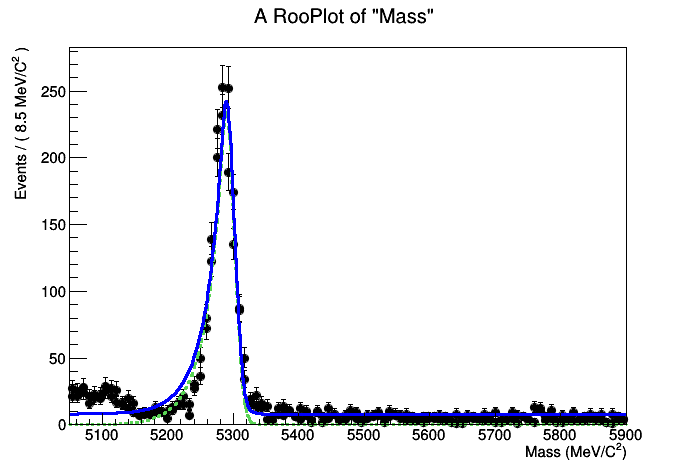

In [33]:
#Plot
canvasB=ROOT.TCanvas("canvasB", "canvasB")
frame=mass.frame()
data_to_fit_minus.plotOn(frame)
data_to_fit_plus.plotOn(frame)
model_3.plotOn(frame, ROOT.RooFit.Components("signal"),ROOT.RooFit.LineColor(8),ROOT.RooFit.LineStyle(2))
model_3.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(46),ROOT.RooFit.LineStyle(2))
model_3.plotOn(frame)

leg = ROOT.TLegend(0.1, 0.7, 0.3, 1.7)
leg.SetHeader("Legend")
leg.AddEntry(data_to_fit_minus, "data_to_fit_minus")
leg.AddEntry(data_to_fit_plus, "data_to_fit_plus")
leg.Draw("same")

frame.Draw()
canvasB.Draw()

The plot above represents the fitting of the dataset after the events were attributed to either the B + set or the B- set. As can be seen, the Crystal ball approximation for the signal is well suited. It can be seen that the pre-selection has been applied since the number of events in the above plot is lower than the number of events in the plot of the CutTree data set. In fact, the peak of the CutTree dataset was at about 500 events (B-meson mass), while on the above graph, the peak is at about 250 events (B-meson mass).

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [29]:
#help(tree)

In [30]:
import math
#Here do your calculation of the final result
min = minusTree.GetEntries()
max = plusTree.GetEntries()

print(min)
print(max)
 
#Calculating asymmetry
A = (2179.0 - 2288.0)/(2179.0 + 2288.0)
print(A)

print('The value of the asymmetry for the dataset at hand is ', A)

#Uncertainty of the result
sigma = math.sqrt((1-A**2)/(2179+2288))

print(sigma)
print("The uncertainty in the results is ", sigma)

2179
2288
-0.0244011640922
('The value of the asymmetry for the dataset at hand is ', -0.024401164092231923)
0.0149576267647
('The uncertainty in the results is ', 0.014957626764661747)


The above calculations for the asymmetry yielded a negative answer. This means that more matter is created than anti-matter. In fact, if the answer is negative this means that the numerator is negative. In order for this to happen, the number of B+ particles (matter) must be higher than the number of B- (anti-matter) produced. Hence, the analysis of this data set supports the hypothesis that more matter than anti-matter is created. 

Finally, the uncertainty results is 0.01496. This is a very low value and hence, it demonstrates that our calculations are accurate and hence, can be trusted.

In conclusion, the analysis performed in this notebook is in accordance with the theory: more matter than anti-matter is produced.

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter 

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [ ]:
#Make the revised Dalitz plot here for B+ mesons

In [ ]:
#Make the revised Dalitz plot here for B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)